### import dependencies

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### inspect and arrange data

In [3]:
# load rankings data
gtaw = pd.read_csv("Golden_Ticket_Award_Winners_Wood.csv")
# print(gtaw)
# load rankings data
gtas = pd.read_csv("Golden_Ticket_Award_Winners_Steel.csv")
# print(gtas.head())

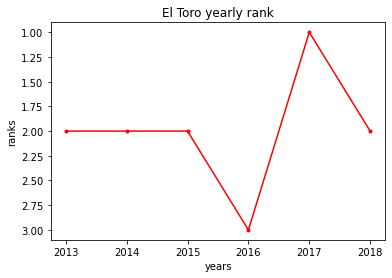

In [4]:
# Create a function to plot rankings over time for 1 roller coaster
def ranking_graph1(x,y,data):
  # print(data["Name"])
  roller_df = data[(data["Name"] == x) & (data["Park"]==y) ]
  years = roller_df["Year of Rank"].values
  ranks = roller_df.Rank.values
  # print(roller_df)
  # print(ranks)
  # print(years)
  ax = plt.subplot()
  plt.plot(range(len(ranks)),ranks,color = "red",label =x,marker = ".")
  plt.title(x+" yearly rank")
  plt.xlabel("years")
  plt.ylabel("ranks")
  ax.set_xticks(range(len(ranks)))
  ax.set_xticklabels(years)
  ax.invert_yaxis() 
  plt.show()
ranking_graph1("El Toro","Six Flags Great Adventure",gtaw)

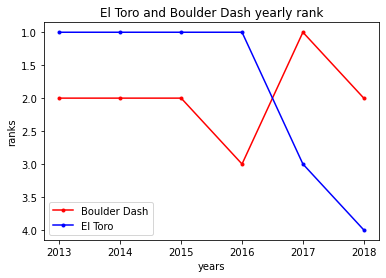

In [5]:
# Create a plot of El Toro and Boulder dash hurricanes
def ranking_graph1(x0,x1,y0,y1,data):
  # print(data["Name"])
  roller_df1 = data[(data["Name"] == x0) & (data["Park"]==x1) ]
  years1 = roller_df1["Year of Rank"].values
  ranks1 = roller_df1.Rank.values
  roller_df2 = data[(data["Name"] == y0) & (data["Park"]==y1) ]
  years2 = roller_df2["Year of Rank"].values
  ranks2 = roller_df2.Rank.values
  # print(roller_df)
  # print(ranks)
  # print(years)
  ax = plt.subplot()
  plt.plot(range(len(ranks1)),ranks1, color = "red",label =x0,marker = ".")
  plt.plot(range(len(ranks2)),ranks2,color = "blue",label =y0,marker = ".")
  plt.legend(labels =[y0,x0])
  plt.title( x0+" and "+y0 +" yearly rank")
  plt.xlabel("years")
  plt.ylabel("ranks")
  ax.set_xticks(range(len(ranks1)))
  ax.set_xticklabels(years1)
  ax.invert_yaxis() 
  plt.show()
ranking_graph1("El Toro","Six Flags Great Adventure","Boulder Dash","Lake Compounce",gtaw)

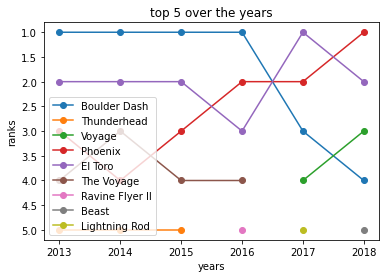

In [15]:
# Create a function to plot top n rankings over time

# Create a plot of top n rankings over time
def Top_n_rank(n,data):
    labels=[]
    rollers = data[data["Rank"]<=n]
    ax = plt.subplot()
    for i in set(rollers['Name']):
      labels.append(i)
      unique = rollers[rollers['Name'] == i]
      # print(unique)
      plt.plot(unique['Year of Rank'],unique['Rank'],label=i,marker = "o")
    plt.legend(labels = labels)
    plt.title( "top "+ str(n)+" over the years")
    plt.xlabel("years")
    plt.ylabel("ranks")
    ax.invert_yaxis()
    plt.show()
Top_n_rank(5,gtaw)

                                     name material_type seating_type  speed  \
0                                Goudurix         Steel     Sit Down   75.0   
1                           Dream catcher         Steel    Suspended   45.0   
2                              Alucinakis         Steel     Sit Down   30.0   
3                                Anaconda        Wooden     Sit Down   85.0   
4                                  Azteka         Steel     Sit Down   55.0   
...                                   ...           ...          ...    ...   
2797                     Dragon Challenge         Steel     Sit Down    NaN   
2798                           Wild Mouse         Steel     Spinning    NaN   
2799  Unnamed Atlantica Supersplash Clone         Steel     Sit Down   80.0   
2800      Unknown Duelling Launch Coaster         Steel           na    NaN   
2801                        Black Diamond         Steel     Sit Down    NaN   

      height  length  num_inversions               

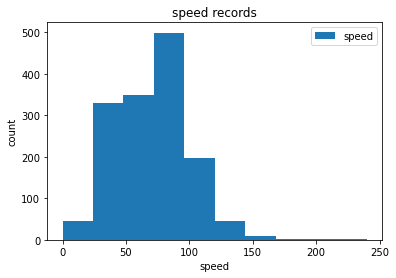

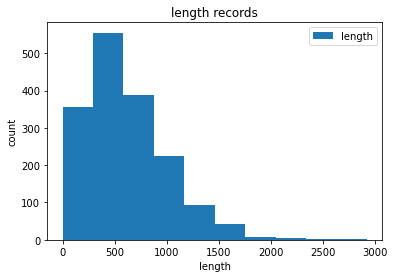

<Figure size 432x288 with 0 Axes>

In [7]:
# load roller coaster data
data = pd.read_csv("roller_coasters.csv")
print(data)
plt.clf()

# Create a function to plot histogram of column values
def hist_plot (x,data):
  if data[x].dtypes == "float" or data[x].dtypes ==  "int":
    data[x] = data[x].dropna()
    ax = plt.hist(data[x] ,range = (data[x].min(),data[x].max()), label = x)
    
    plt.legend()
    plt.xlabel(x)
    plt.ylabel("count")
    plt.title( x +" records")
    plt.show()
    plt.clf()
# Create histogram of roller coaster speed
hist_plot ("speed",data)
# Create histogram of roller coaster length
hist_plot ("length",data)

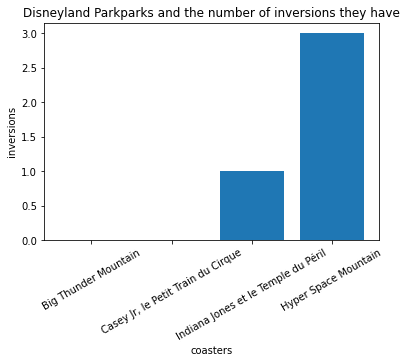

In [24]:
# Create a function to plot inversions by coaster at park
def num_inversions(data,x):
    data = data[data["park"]==x]
    coasters = data.name
    inversions = data.num_inversions
    plt.title( x + "parks and the number of inversions they have")
    plt.xlabel("coasters")
    plt.ylabel("inversions")
    plt.xticks(rotation = 30)
    plt.bar(coasters,inversions)
    
# Create barplot of inversions by roller coasters
num_inversions(data,"Disneyland Park")

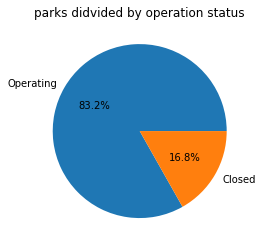

In [26]:
# a function that creates a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely')
def pie_c(data,x):
    operating_coasters = data[data["status"]=='status.operating']
    closed_coasters = data[data["status"]=='status.closed.definitely']
    counts = [len(operating_coasters), len(closed_coasters)]
    plt.title( "parks didvided by operation status")
    plt.pie(counts,autopct ='%0.1f%%', labels = ['Operating','Closed'])
pie_c(data, data["status"].unique())

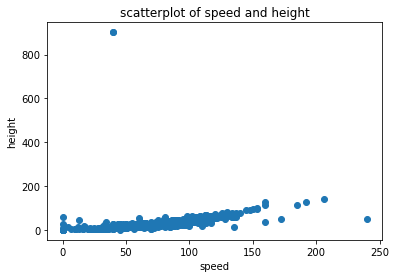

In [32]:
# a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame

def scat(data,a,b):
    
    data1 = data[a]
    data2 = data[b]
    plt.title("scatterplot of "+ a +" and "+ b )
    plt.xlabel(a)
    plt.ylabel(b)
    plt.scatter(x=data1,y=data2)

scat(data,"speed","height")


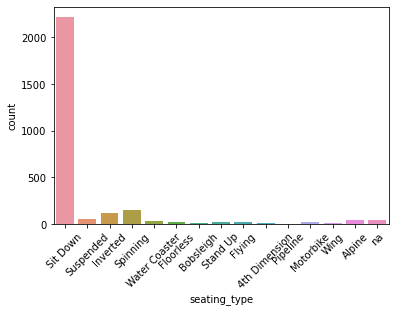

In [39]:
# group roller coasters by seat type
def seat(data):
    plt.xticks(rotation = 45)
    sns.countplot(data = data, x =data["seating_type"])
seat(data)